In [ ]:
!pip install numpy matplotlib seaborn tensorflow scikit-learn setuptools

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#import setuptools.distutils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_lenet():
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_vgg():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))  
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))  
    model.add(layers.Dense(10, activation='softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


lenet_model = build_lenet()
vgg_model = build_vgg()


print("Training LeNet Model...")
lenet_history = lenet_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

print("Training VGG Model...")
vgg_history = vgg_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

lenet_test_loss, lenet_test_acc = lenet_model.evaluate(x_test, y_test, verbose=2)
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(x_test, y_test, verbose=2)

print(f"\nLeNet Model Test accuracy: {lenet_test_acc:.4f}")
print(f"VGG Model Test accuracy: {vgg_test_acc:.4f}")


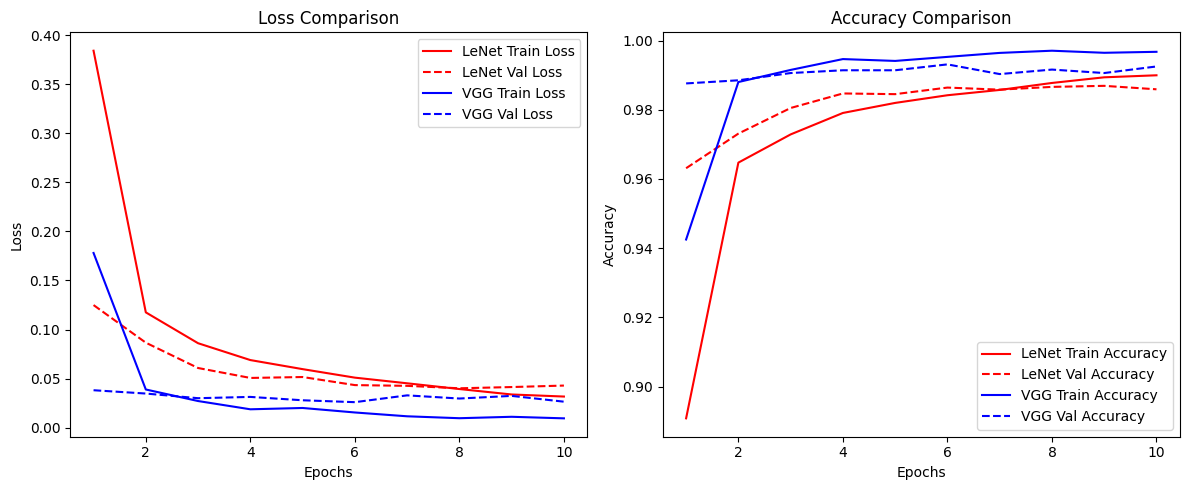

In [ ]:
import matplotlib.pyplot as plt

lenet_train_loss = lenet_history.history['loss']
lenet_val_loss = lenet_history.history['val_loss']
lenet_train_acc = lenet_history.history['accuracy']
lenet_val_acc = lenet_history.history['val_accuracy']

vgg_train_loss = vgg_history.history['loss']
vgg_val_loss = vgg_history.history['val_loss']
vgg_train_acc = vgg_history.history['accuracy']
vgg_val_acc = vgg_history.history['val_accuracy']

epochs = range(1, len(lenet_train_loss) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, lenet_train_loss, 'r-', label='LeNet Train Loss')
plt.plot(epochs, lenet_val_loss, 'r--', label='LeNet Val Loss')
plt.plot(epochs, vgg_train_loss, 'b-', label='VGG Train Loss')
plt.plot(epochs, vgg_val_loss, 'b--', label='VGG Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, lenet_train_acc, 'r-', label='LeNet Train Accuracy')
plt.plot(epochs, lenet_val_acc, 'r--', label='LeNet Val Accuracy')
plt.plot(epochs, vgg_train_acc, 'b-', label='VGG Train Accuracy')
plt.plot(epochs, vgg_val_acc, 'b--', label='VGG Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
